# Exploratory Analysis of Dataset

In [25]:
%matplotlib inline
import pandas as pd
import json

from scipy import stats
from sklearn.preprocessing import power_transform

In [19]:
airbnb_df = pd.read_csv('airbnb-listings-us.csv', sep=';')


/home/schanx/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (40,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [76]:
with open('features/features.json') as f:
    features = json.load(f)
    print(features['continuous_features'])

['Host Total Listings Count', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Calendar Updated', 'Host Acceptance Rate', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365']


In [75]:
airbnb_df.groupby(["Availability 365"])["Availability 365"].count()

Availability 365
0      26188
1        625
2        554
3        503
4        537
5        463
6        444
7        433
8        441
9        396
10       418
11       354
12       369
13       362
14       368
15       305
16       385
17       326
18       304
19       298
20       311
21       275
22       260
23       279
24       270
25       266
26       257
27       271
28       280
29       320
       ...  
336      689
337      572
338      490
339      449
340      527
341      495
342      487
343      468
344      443
345      431
346      473
347      517
348      514
349      472
350      541
351      531
352      586
353      558
354      597
355      611
356      657
357      682
358      877
359      690
360      685
361      776
362      937
363     1232
364     2933
365     7961
Name: Availability 365, dtype: int64

In [55]:

airbnb_df['Bathrooms'].isnull().sum()
#temp

429

In [1]:
airbnb_df['Review Scores Rating'].hist(bins=100)

NameError: name 'airbnb_df' is not defined

In [ ]:
airbnb_df['Square Feet'][airbnb_df['Square Feet'] > 10000]

In [80]:
imputed = airbnb_df['Availability 365']#.fillna(airbnb_df['Maximum Nights'].median(skipna=True))
imputed = imputed.mask(imputed == 0, 1) #imputed.median())

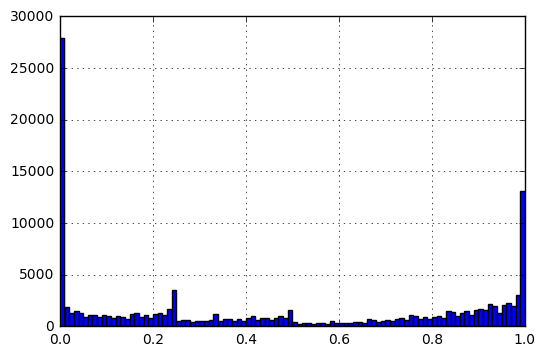

In [78]:
# min-max
min_val = imputed.min()
max_val = imputed.max()
imputed_normalized_minmax = imputed.apply(lambda x: (x - min_val) / (max_val - min_val))
imputed_normalized_minmax.hist(bins=100)

array([20.193094  , 17.16486275, 19.73084017, ..., 11.56893073,
        0.        , 20.53620018])

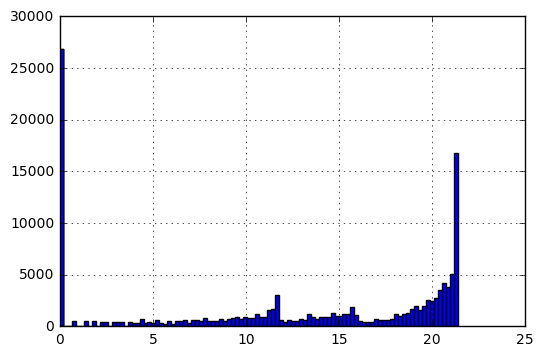

In [81]:
# box-cox
imputed_normalized_boxcox, _ = stats.boxcox(imputed)
pd.DataFrame(imputed_normalized_boxcox)[0].hist(bins=100)
#imputed
imputed_normalized_boxcox

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cb4324b00>]],
      dtype=object)

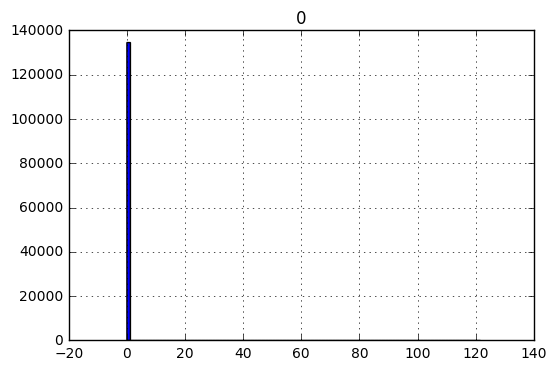

In [67]:
# zscore
imputed_normalized_zscore = stats.zscore(imputed)
pd.DataFrame(imputed_normalized_zscore).hist(bins=100)

In [ ]:
airbnb_df['Price'][airbnb_df['Price'] == 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cb42116d8>]],
      dtype=object)

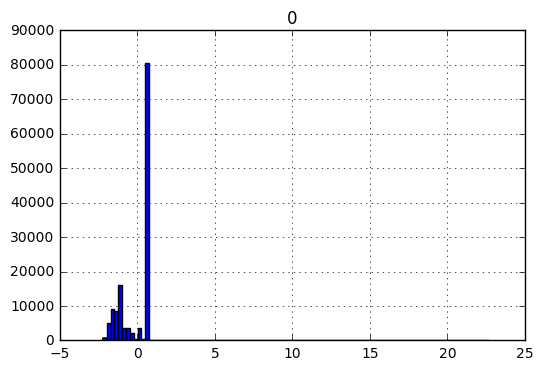

In [68]:
imputed_normalized_power_transform = power_transform(imputed.reshape(-1,1), method='box-cox')
pd.DataFrame(imputed_normalized_power_transform).hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c9c6be550>]],
      dtype=object)

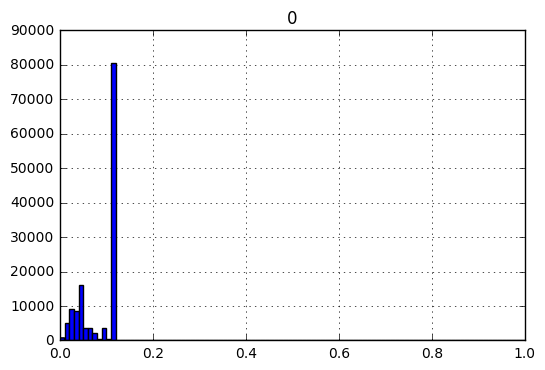

In [69]:
imp_boxcox_minmax=pd.DataFrame(imputed_normalized_boxcox)
min_val = imp_boxcox_minmax.min()
max_val = imp_boxcox_minmax.max()
imp_boxcox_minmax[0]
imputed_normalized_minmax = imp_boxcox_minmax[0].apply(lambda x: (x - min_val) / (max_val - min_val))
imputed_normalized_minmax.hist(bins=100)

In [33]:
airbnb_df[features['continuous_features']]['Beds'].isnull().sum()

0

In [69]:
#airbnb_df['Host Acceptance Rate']=airbnb_df['Host Acceptance Rate'].apply(str).apply(lambda x: x.rstrip('%'))
#airbnb_df['Host Acceptance Rate']
# min_val = airbnb_df['Host Acceptance Rate'].min()
# max_val = airbnb_df['Host Acceptance Rate'].max()
# airbnb_df['Host Acceptance Rate'] = airbnb_df['Host Acceptance Rate'].apply(lambda x: (x - min_val) / (max_val - min_val))

In [5]:
# 1st

# mapping of string based temporal data to numeric values
map=dict({'a':1,'day':1,'week':7,'month':30,'year':365,'yesterday':1,'today':0,'never':4000})

# calendar update
max_val=0
def get_days(data):
    if len(data)==1:
        return map.get(data[0])
    else:
        data[1]=data[1][:-1] if data[1][-1]=='s' else data[1]
        return map.get(data[0])*map.get(data[1]) if data[0] in map else int(data[0])*map.get(data[1]) # else int(data[0])*map.get(data[1]))
    
airbnb_df['Calendar Updated']=airbnb_df['Calendar Updated'].apply(lambda x: get_days(x.split()))

#airbnb_df.groupby(['Calendar Updated']).count()

In [6]:
# 2nd fill nans
features['continuous_features'].remove('Host Acceptance Rate')
for i in features['continuous_features']:
    airbnb_df[i]=airbnb_df[i].fillna(airbnb_df[i].median(skipna=True))

In [7]:
# 3rd normalize
for imputed in airbnb_df[features['continuous_features']]:
    min_val = airbnb_df[imputed].min()
    max_val = airbnb_df[imputed].max()
    airbnb_df[imputed] = airbnb_df[imputed].apply(lambda x: (x - min_val) / (max_val - min_val))

In [28]:
airbnb_df[features['continuous_features']]

,Host Total Listings Count,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Calendar Updated,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365
0,0.007181,0.024774,0.108108,0.550551,0.038333,0.200200,0.052632,0.00175,0.20,0.10,0.2,0.1875,0.05,0.00,0.001601,5.234033e-07,0.166667,0.216667,0.477778,0.871233
1,0.000898,0.024774,0.108108,0.550551,0.038333,0.200200,0.052632,0.00025,0.15,0.10,0.2,0.1250,0.05,0.00,0.023219,5.234033e-07,0.000000,0.000000,0.033333,0.594521
2,0.004488,0.024774,0.108108,0.550551,0.038333,0.200200,0.052632,0.00700,0.15,0.20,0.2,0.1250,0.20,0.00,0.003203,4.144385e-08,0.200000,0.350000,0.522222,0.824658
3,0.002693,0.024774,0.108108,0.550551,0.038333,0.200200,0.052632,0.00875,0.20,0.10,0.2,0.1250,0.20,0.00,0.000801,5.234033e-07,0.266667,0.583333,0.655556,0.915068
4,0.000898,0.024774,0.108108,0.550551,0.038333,0.200200,0.052632,0.01225,0.25,0.20,0.2,0.3750,0.05,0.00,0.000000,5.234033e-07,0.300000,0.216667,0.144444,0.602740
5,0.000898,0.024774,0.108108,0.550551,0.038333,0.200200,0.052632,0.00175,0.25,0.20,0.2,0.2500,0.10,0.00,0.000801,5.234033e-07,0.133333,0.400000,0.511111,0.873973
6,0.005386,0.024774,0.108108,0.550551,0.038333,0.200200,0.052632,0.01500,0.15,0.10,0.1,0.1250,0.05,0.00,0.000000,5.234033e-07,0.833333,0.900000,0.933333,0.983562
7,0.000898,0.024774,0.108108,0.550551,0.038333,0.200200,0.052632,0.00175,0.00,0.10,0.1,0.0625,0.05,0.00,0.000000,5.234033e-07,0.166667,0.083333,0.388889,0.849315
8,0.000898,0.024774,0.108108,0.550551,0.038333,0.200200,0.052632,0.00175,0.15,0.10,0.1,0.1250,0.10,0.00,0.000000,5.587935e-09,0.200000,0.433333,0.622222,0.400000
9,0.001795,0.024774,0.108108,0.550551,0.038333,0.200200,0.052632,0.00700,0.00,0.10,0.1,0.0625,0.05,0.00,0.000000,3.394671e-07,0.066667,0.533333,0.688889,0.923288


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(airbnb_df[features['continuous_features']])

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [16]:
pcaCompDf = pd.DataFrame(principalDf.values)


In [26]:


print(pd.DataFrame(pca.components_,columns=airbnb_df[features['continuous_features']].columns,index =['principal component 1', 'principal component 2','principal component 3']))

                       Host Total Listings Count  Square Feet     Price  \
principal component 1                   0.006453     0.000078  0.010751   
principal component 2                   0.001878    -0.000127 -0.021702   
principal component 3                   0.015278     0.001526  0.431874   

                       Weekly Price  Monthly Price  Security Deposit  \
principal component 1     -0.001191       0.001758          0.001693   
principal component 2     -0.006913      -0.003115         -0.021407   
principal component 3      0.032191       0.028756          0.183095   

                       Cleaning Fee  Calendar Updated  Accommodates  \
principal component 1      0.006405          0.001732      0.014770   
principal component 2     -0.015973          0.024829     -0.059636   
principal component 3      0.149344         -0.030056      0.560918   

                       Bathrooms  Bedrooms      Beds  Guests Included  \
principal component 1   0.008460  0.007751  0.010682

In [194]:
import matplotlib.pyplot as plt

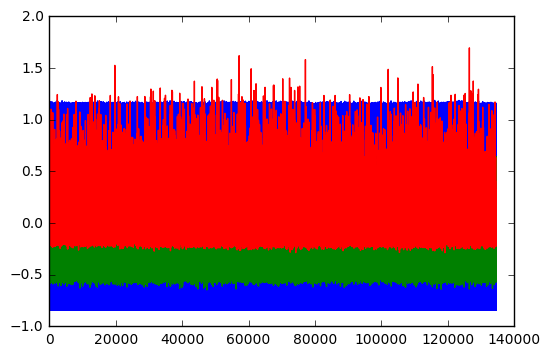

In [228]:
plt.plot(pcaCompDf)
plt.show()

In [470]:
from sklearn.cluster import KMeans

In [471]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pcaCompDf)

In [472]:
labels_kmeans=kmeans.predict(pcaCompDf)
centroids=kmeans.cluster_centers_
kmeansPd = pd.DataFrame(labels_kmeans)


In [473]:
pcaCompDf.insert((pcaCompDf.shape[1]),'kmeans',kmeansPd)

In [475]:
pcaCompDf.to_csv("pca_kmeans.csv",sep=",")

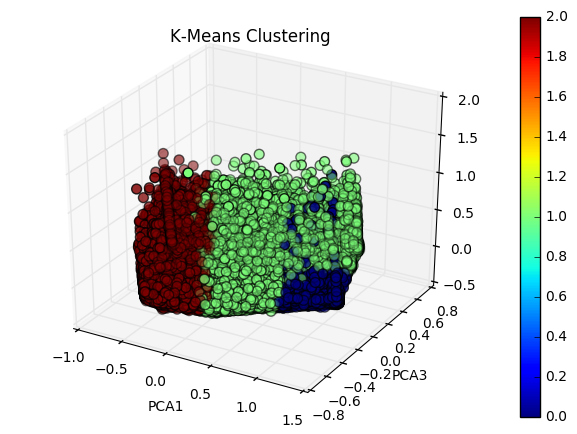

In [255]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
scatter = ax.scatter(pcaCompDf[0],pcaCompDf[1],pcaCompDf[2],
                     c=kmeansPd[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_ylabel('PCA3')
plt.colorbar(scatter)

In [264]:
# from sklearn.cluster import AgglomerativeClustering
# agg = AgglomerativeClustering().fit(pcaCompDf)

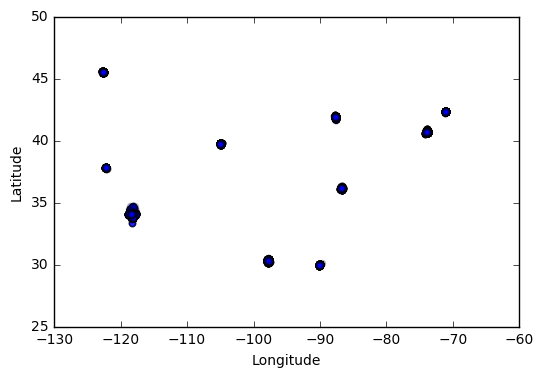

In [258]:
import matplotlib.pyplot as plt
airbnb_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)
plt.show()

In [268]:
# get original data points based on the cluster assignments
clusterMap=dict()
k = 3
for i in range(k):
    clusterMap[i] = pcaCompDf[pcaCompDf.kmeans==i].index.values

In [288]:
airbnb_df

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
Review Scores Value,,,,,,,,,,,,,,,,,,,,,
2.0,133,152,133,152,152,151,82,152,152,67,...,152,151,151,5,56,152,152,152,133,133
3.0,9,9,9,9,9,9,5,9,9,4,...,9,9,9,0,5,9,9,9,9,9
4.0,150,198,150,198,197,194,117,198,198,95,...,197,196,197,4,77,198,198,198,150,150
5.0,77,97,77,97,97,96,53,97,97,46,...,97,97,97,1,43,97,97,97,77,77
6.0,705,875,705,875,874,854,534,873,875,442,...,873,874,873,30,359,875,875,875,705,705
7.0,723,908,723,908,907,871,591,908,908,466,...,908,908,908,32,400,908,908,908,723,722
8.0,5266,6547,5266,6547,6546,6277,4672,6545,6547,3824,...,6541,6542,6542,257,2805,6547,6547,6547,5266,5265
9.0,26536,33671,26536,33671,33664,31851,27969,33667,33671,23261,...,33671,33671,33671,2642,16108,33671,33671,33671,26536,26526
10.0,47623,59281,47623,59281,59272,57853,46064,59268,59281,40824,...,59248,59269,59265,6080,30018,59281,59281,59281,47623,47603


In [306]:
airbnb_df.groupby(['Beds']).count()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
Beds,,,,,,,,,,,,,,,,,,,,,
0.0000,5,8,5,8,8,8,8,8,8,5,...,4,4,4,0,4,8,8,5,5,5
0.0625,62034,77050,62034,77050,77008,74385,52307,77017,77050,44916,...,57419,57339,57326,4703,34608,77050,77050,58497,62034,61985
0.1250,24306,31133,24306,31133,31128,30298,23144,31126,31133,20076,...,24207,24174,24166,2778,15734,31133,31133,24536,24306,24296
0.1875,10473,13499,10473,13499,13498,13122,10444,13495,13499,8960,...,10419,10409,10406,1341,7015,13499,13499,10539,10473,10465
0.2500,5066,6578,5066,6578,6577,6415,5193,6576,6578,4428,...,5019,5011,5009,664,3537,6578,6578,5089,5066,5063
0.3125,2195,2912,2195,2912,2912,2835,2335,2912,2912,1917,...,2207,2207,2208,282,1602,2912,2912,2236,2195,2195
0.3750,1262,1561,1262,1561,1561,1520,1253,1561,1561,1035,...,1191,1191,1191,176,810,1561,1561,1210,1262,1261
0.4375,472,604,472,604,604,590,488,604,604,403,...,463,463,463,61,292,604,604,468,472,472
0.5000,397,483,397,483,483,476,399,483,483,350,...,405,405,405,52,270,483,483,406,397,397


In [304]:
features

{'textual_features': ['Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighbourhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 'Neighbourhood Cleansed'], 'categorical_features': ['Host Response Time', 'Host Verifications', 'Property Type', 'Room Type', 'Bed Type', 'Amenities'], 'geo_features': ['Latitude', 'Longitude', 'Country', 'City', 'Zipcode', 'Market', 'State', 'Street', 'Host Location', 'Host Neighbourhood'], 'continuous_features': ['Host Total Listings Count', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Calendar Updated', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365']}

In [53]:
# 9th 1 hot encoding the categorical features
#features['categorical_features'].remove('Host Verifications')
#features['categorical_features'].remove('Amenities')
#print(features['categorical_features'])
#temp=pd.get_dummies(airbnb_df[features['categorical_features']])
#print(temp.shape)
#airbnb_latest = pd.concat([airbnb_df, temp], axis=1, join_axes=[airbnb_df.index])
#print(airbnb_latest.head())
airbnb_latest.to_csv("latest_airbnb.csv",sep=";")

In [9]:
# 5th & 12th(amenities)
import re

# def clean_host_verifications(x):
#     return ''.join(re.split(r'[\[\s\'\]\d]', x))
# airbnb_df['Host Verifications']=airbnb_df[features['categorical_features']]['Host Verifications'].apply(lambda x: clean_host_verifications(x))

def clean_amenities(x):
    return ''.join(re.split(r'[\{\"\}:]', x))
airbnb_df['Amenities']=airbnb_df['Amenities'].apply(lambda x: clean_amenities(x))


In [10]:
# 6th
airbnb_df['Host Verifications']=airbnb_df[features['categorical_features']]['Host Verifications'].apply(lambda x: 'no_verification' if x=='None' or x=='' else x)

In [398]:
airbnb_df[features['categorical_features']]['Host Verifications'].isnull().values.sum()

0

In [8]:
# 4th & 11th
# filled nans with a type

# airbnb_df['Host Verifications']=airbnb_df[features['categorical_features']]['Host Verifications'].fillna('no_verification')

airbnb_df['Amenities']=airbnb_df['Amenities'].fillna('no_amenities')


In [59]:
airbnb_df.groupby(['Amenities']).count()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,sesame,sesame_offline,government_id,manual_online,identity_manual,kba,jumio,work_email,manual_offline,facebook
Amenities,,,,,,,,,,,,,,,,,,,,,
,0,245,0,245,245,231,95,245,245,68,...,245,245,245,245,245,245,245,245,245,245
24-Hour Check-in,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
Air Conditioning,0,1,0,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Essentials,Shampoo,Iron",1,1,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector",0,1,0,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Heating,Smoke Detector,Carbon Monoxide Detector,Shampoo,24-Hour Check-in,Iron",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Heating,Smoke Detector,First Aid Kit,Safety Card,Shampoo",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Smoke Detector,Carbon Monoxide Detector,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Laptop Friendly Workspace",1,1,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Smoking Allowed,Breakfast,Heating,Family/Kid Friendly,Dryer,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Essentials,Shampoo,24-Hour Check-in,Hangers,Iron",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [12]:
#create new columns for verifications
# 7th and 10th (amenities)
verifications_set=set()
verifications_set_amn=set()

# def expand_as_cols(x):
#     global verifications_set
#     temp=x.split(",")
#     verifications_set|=set(temp)
# airbnb_df[features['categorical_features']]['Host Verifications'].apply(lambda x: expand_as_cols(x))

def expand_as_cols(x):
    global verifications_set_amn
    temp=x.split(",")
    verifications_set_amn|=set(temp)
airbnb_df[features['categorical_features']]['Amenities'].apply(lambda x: expand_as_cols(x))

print(verifications_set_amn)
#print(verifications_set)

{'no_verification', 'phone', 'amex', 'reviews', 'email', 'google', 'linkedin', 'sent_id', 'weibo', 'offline_government_id', 'photographer', 'selfie', 'sesame', 'sesame_offline', 'government_id', 'manual_online', 'identity_manual', 'kba', 'jumio', 'work_email', 'manual_offline', 'facebook'}


In [380]:
# export data
# airbnb_df.to_csv("preprocessed_cont.csv",sep=";")

In [465]:
airbnb_df['Host Verifications'][airbnb_df['Host Verifications']==''].count()

0

In [464]:
airbnb_df.Price.isnull().sum()

0

In [13]:
#8th
for i in verifications_set:
    airbnb_df[i]=0

In [13]:
new_df=pd.DataFrame()
# def update_verifications_col(x,idx):
#     for i in x.split(","):
#         =1
# airbnb_df['Host Verifications'].apply(lambda x: update_verifications_col(x))
# df.at['C', 'x'] = 10

In [23]:
# encode 1 0 values
for i in airbnb_df.index.values.tolist():
    new_cols=airbnb_df['Host Verifications'].loc[i].split(",")
    for j in new_cols:
        airbnb_df.at[i,j]=1
#     if 'no_verification' in new_cols:
#         airbnb_df.at[i,'no_verification']=1

In [26]:
airbnb_df[list(verifications_set)].head()

,no_verification,phone,amex,reviews,email,google,linkedin,sent_id,weibo,offline_government_id,...,sesame,sesame_offline,government_id,manual_online,identity_manual,kba,jumio,work_email,manual_offline,facebook
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [23]:
boston_csv=pd.read_csv("listing.csv")

OSError: File b'listing.csv' does not exist

In [24]:
# Read GeoJSON file
abb = gpd.read_file('neighbourhoods.geojson')
# Manually set CRS (it might work without depending on 
# machine, but just in case)
abb.crs = {'init': u'epsg:27700'}
abb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
neighbourhood          26 non-null object
neighbourhood_group    26 non-null object
geometry               26 non-null object
dtypes: object(3)
memory usage: 704.0+ bytes


In [5]:
new_airbnb_df = pd.read_csv('latest_airbnb.csv', sep=';')

/home/schanx/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,3,20,41,47,50,59,60,63,64,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
new_airbnb_df[["Latitude","Longitude","Accommodates","Bathrooms","Beds","Review Scores Accuracy","Review Scores Checkin",
"Review Scores Cleanliness","Review Scores Communication","Review Scores Location","Review Scores Rating","Review Scores Value"]]

,Latitude,Longitude,Accommodates,Bathrooms,Beds,Review Scores Accuracy,Review Scores Checkin,Review Scores Cleanliness,Review Scores Communication,Review Scores Location,Review Scores Rating,Review Scores Value
0,NaN,NaN,0.2,0.10,0.1875,10.0,10.0,10.0,10.0,10.0,100.0,10.0
1,NaN,NaN,0.15,0.10,0.1250,10.0,10.0,10.0,10.0,10.0,100.0,10.0
2,NaN,NaN,0.15,0.20,0.1250,10.0,10.0,9.0,10.0,9.0,93.0,10.0
3,NaN,NaN,0.2,0.10,0.1250,10.0,10.0,10.0,10.0,10.0,94.0,10.0
4,NaN,NaN,0.25,0.20,0.3750,10.0,10.0,10.0,10.0,10.0,100.0,10.0
5,NaN,NaN,0.25,0.20,0.2500,9.0,9.0,8.0,9.0,9.0,84.0,9.0
6,NaN,NaN,0.15,0.10,0.1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0,0.10,0.0625,10.0,10.0,10.0,10.0,10.0,98.0,10.0
8,NaN,NaN,0.15,0.10,0.1250,10.0,10.0,9.0,10.0,10.0,96.0,10.0
9,NaN,NaN,0,0.10,0.0625,10.0,10.0,10.0,10.0,9.0,97.0,10.0


In [29]:
new_airbnb_df["Longitude"].fillna()

31744

In [7]:
temp=new_airbnb_df[["Latitude","Longitude","Accommodates","Bathrooms","Beds","Review Scores Accuracy","Review Scores Checkin",
"Review Scores Cleanliness","Review Scores Communication","Review Scores Location","Review Scores Rating","Review Scores Value"]]

temp

In [26]:
latest_airbnb_df=pd.read_csv("latest_airbnb.csv",sep=";")

/home/schanx/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,3,20,41,47,50,59,60,63,64,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
latest_airbnb_df['Amenities'].head()

0    {TV,Internet,"Wireless Internet",Kitchen,"Free...
1    {TV,"Cable TV",Internet,"Wireless Internet",Po...
2    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
3    {TV,"Cable TV",Internet,"Wireless Internet","A...
4    {TV,"Wireless Internet","Air Conditioning",Poo...
Name: Amenities, dtype: object

In [34]:
import re

latest_airbnb_df['Amenities']=latest_airbnb_df['Amenities'].fillna('no_amenities')

def clean_amenities(x):
    return ''.join(re.split(r'[\{\"\}:]', x))
latest_airbnb_df['Amenities']=latest_airbnb_df['Amenities'].apply(lambda x: clean_amenities(x))


#latest_airbnb_df['Host Verifications']=latest_airbnb_df[features['categorical_features']]['Host Verifications'].apply(lambda x: 'no_verification' if x=='None' or x=='' else x)

,Unnamed: 0,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Property Type_Villa,Property Type_Yurt,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed
Amenities,,,,,,,,,,,,,,,,,,,,,
,245,0,245,0,245,245,231,95,245,245,...,245,245,245,245,245,245,245,245,245,245
10.0,6,6,5,1,6,6,5,6,6,6,...,0,0,0,0,0,0,0,0,0,0
24-Hour Check-in,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Air Conditioning,1,0,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Essentials,Shampoo,Iron",1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector",1,0,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Heating,Smoke Detector,Carbon Monoxide Detector,Shampoo,24-Hour Check-in,Iron",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Heating,Smoke Detector,First Aid Kit,Safety Card,Shampoo",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Smoke Detector,Carbon Monoxide Detector,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Laptop Friendly Workspace",1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [38]:
latest_airbnb_df[latest_airbnb_df['Amenities']=='10.0']

,Unnamed: 0,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Property Type_Villa,Property Type_Yurt,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed
11578,I'm your Inn Keeper. Welcome to San Diego. I a...,within an hour,NaN,100%,https://a2.muscache.com/im/users/14563963/prof...,https://a2.muscache.com/im/users/14563963/prof...,NaN,1.0,0.0008976660682226212,"email,phone,reviews,kba",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35505,I have completely renovated my place in Del Re...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/441cc764-7...,https://a0.muscache.com/im/pictures/441cc764-7...,Del Rey,2.0,0.0017953321364452424,"email,phone,facebook,reviews,kba",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79959,I am also a recording artist and I have my own...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/026463fa-3...,https://a0.muscache.com/im/pictures/026463fa-3...,Harlem,1.0,0.0008976660682226212,"email,phone,reviews",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101996,I travel often :),within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/e3a6b418-8...,https://a0.muscache.com/im/pictures/e3a6b418-8...,Brooklyn Navy Yard,1.0,0.0008976660682226212,"email,phone,reviews",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102324,I have completely renovated my place in Del Re...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/441cc764-7...,https://a0.muscache.com/im/pictures/441cc764-7...,Del Rey,2.0,0.0017953321364452424,"email,phone,facebook,reviews,kba",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118387,I am amazed by all kinds of art expression...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/880e13a8-1...,https://a0.muscache.com/im/pictures/880e13a8-1...,Long Beach,1.0,0.0008976660682226212,"email,phone,facebook,reviews,jumio,government_id",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Property Type_Villa,Property Type_Yurt,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed
Amenities,,,,,,,,,,,,,,,,,,,,,
24-Hour Check-in,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Air Conditioning,1,0,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Essentials,Shampoo,Iron",1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector",1,0,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Heating,Smoke Detector,Carbon Monoxide Detector,Shampoo,24-Hour Check-in,Iron",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Heating,Smoke Detector,First Aid Kit,Safety Card,Shampoo",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Smoke Detector,Carbon Monoxide Detector,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Laptop Friendly Workspace",1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Smoking Allowed,Breakfast,Heating,Family/Kid Friendly,Dryer,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Essentials,Shampoo,24-Hour Check-in,Hangers,Iron",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Air Conditioning,Free Parking on Premises,Smoking Allowed,Pets Allowed,Family/Kid Friendly,First Aid Kit,Essentials,Lock on Bedroom Door",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [63]:
latest_airbnb_df['Amenities']=latest_airbnb_df['Amenities'].apply(lambda x: re.sub(re.compile(r'(,){2,}'), ',', x))
#latest_airbnb_df['Amenities']=latest_airbnb_df['Amenities'].apply(lambda x:'no_amenities' if x=='None' or x=='' else x)

,Unnamed: 0,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Property Type_Villa,Property Type_Yurt,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed


In [64]:
verifications_set_amn=set()
def expand_as_cols(x):
    global verifications_set_amn
    temp=x.split(",")
    verifications_set_amn|=set(temp)
latest_airbnb_df['Amenities'].apply(lambda x: expand_as_cols(x))

print(verifications_set_amn)

{'Smoking allowed', 'Single level home', 'Cooking basics', 'Wireless Internet', 'Accessible-height bed', 'Elevator in Building', 'First aid kit', 'Dog(s)', 'Dryer', 'Lock on bedroom door', 'Changing table', 'Waterfront', 'Family/kid friendly', 'Wide doorway', 'Buzzer/Wireless Intercom', 'Wheelchair Accessible', 'Free parking on premises', 'Microwave', 'Hot water', 'High chair', 'Fire extinguisher', 'Free Parking on Premises', 'Carbon Monoxide Detector', '24-Hour Check-in', 'Pocket wifi', 'Kitchen', 'Elevator in building', 'Free Parking on Street', '24-hour check-in', 'Private entrance', 'Dishwasher', 'Roll-in shower with shower bench or chair', 'Hair dryer', 'Paid Parking Off Premises', 'Children’s dinnerware', 'Air Conditioning', 'Lock on Bedroom Door', 'Wide clearance to shower and toilet', 'TV', 'Private living room', 'Wheelchair accessible', 'EV charger', 'Baby monitor', 'Laptop Friendly Workspace', 'Baby bath', 'Heating', 'Room-darkening shades', 'Hangers', 'Dishes and silverware'

In [68]:
# for i in verifications_set_amn:
#     latest_airbnb_df[i]=0
# latest_airbnb_df.shape
latest_airbnb_df['Internet'].head()

0    0
1    0
2    0
3    0
4    0
Name: Internet, dtype: int64

In [69]:
# encode 1 0 values amenities
for i in latest_airbnb_df.index.values.tolist():
    new_cols=latest_airbnb_df['Amenities'].loc[i].split(",")
    for j in new_cols:
        latest_airbnb_df.at[i,j]=1


In [74]:
latest_airbnb_df.to_csv("preprocessed_concat_airbnb.csv",sep=";")

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(latest_airbnb_df[catf])

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [89]:
#latest_airbnb_df.columns.tolist()

In [80]:
catf=['no_verification',
 'phone',
 'amex',
 'reviews',
 'email',
 'google',
 'linkedin',
 'sent_id',
 'weibo',
 'offline_government_id',
 'photographer',
 'selfie',
 'sesame',
 'sesame_offline',
 'government_id',
 'manual_online',
 'identity_manual',
 'kba',
 'jumio',
 'work_email',
 'manual_offline',
 'facebook',
 'Host Response Time_a few days or more',
 'Host Response Time_within a day',
 'Host Response Time_within a few hours',
 'Host Response Time_within an hour',
 'Property Type_Apartment',
 'Property Type_Bed & Breakfast',
 'Property Type_Boat',
 'Property Type_Boutique hotel',
 'Property Type_Bungalow',
 'Property Type_Cabin',
 'Property Type_Camper/RV',
 'Property Type_Casa particular',
 'Property Type_Castle',
 'Property Type_Cave',
 'Property Type_Chalet',
 'Property Type_Condominium',
 'Property Type_Dorm',
 'Property Type_Earth House',
 'Property Type_Entire Floor',
 'Property Type_Guest suite',
 'Property Type_Guesthouse',
 'Property Type_Hostel',
 'Property Type_House',
 'Property Type_Hut',
 'Property Type_In-law',
 'Property Type_Island',
 'Property Type_Lighthouse',
 'Property Type_Loft',
 'Property Type_Nature lodge',
 'Property Type_Other',
 'Property Type_Parking Space',
 'Property Type_Pension (Korea)',
 'Property Type_Plane',
 'Property Type_Serviced apartment',
 'Property Type_Tent',
 'Property Type_Timeshare',
 'Property Type_Tipi',
 'Property Type_Townhouse',
 'Property Type_Train',
 'Property Type_Treehouse',
 'Property Type_Vacation home',
 'Property Type_Villa',
 'Property Type_Yurt',
 'Room Type_Entire home/apt',
 'Room Type_Private room',
 'Room Type_Shared room',
 'Bed Type_Airbed',
 'Bed Type_Couch',
 'Bed Type_Futon',
 'Bed Type_Pull-out Sofa',
 'Bed Type_Real Bed',
 'Smoking allowed',
 'Single level home',
 'Cooking basics',
 'Wireless Internet',
 'Accessible-height bed',
 'Elevator in Building',
 'First aid kit',
 'Dog(s)',
 'Dryer',
 'Lock on bedroom door',
 'Changing table',
 'Waterfront',
 'Family/kid friendly',
 'Wide doorway',
 'Buzzer/Wireless Intercom',
 'Wheelchair Accessible',
 'Free parking on premises',
 'Microwave',
 'Hot water',
 'High chair',
 'Fire extinguisher',
 'Free Parking on Premises',
 'Carbon Monoxide Detector',
 '24-Hour Check-in',
 'Pocket wifi',
 'Kitchen',
 'Elevator in building',
 'Free Parking on Street',
 '24-hour check-in',
 'Private entrance',
 'Dishwasher',
 'Roll-in shower with shower bench or chair',
 'Hair dryer',
 'Paid Parking Off Premises',
 'Children’s dinnerware',
 'Air Conditioning',
 'Lock on Bedroom Door',
 'Wide clearance to shower and toilet',
 'TV',
 'Private living room',
 'Wheelchair accessible',
 'EV charger',
 'Baby monitor',
 'Laptop Friendly Workspace',
 'Baby bath',
 'Heating',
 'Room-darkening shades',
 'Hangers',
 'Dishes and silverware',
 'Gym',
 'Fireplace guards',
 'Iron',
 'Cleaning before checkout',
 'Washer',
 'Hot Tub',
 'Coffee maker',
 'Pets Allowed',
 'Bathtub',
 'Private bathroom',
 'Crib',
 'Safety card',
 'Smoke Detector',
 'Step-free access',
 'Buzzer/wireless intercom',
 'Wide clearance to bed',
 'Other pet(s)',
 'Carbon monoxide detector',
 'Lockbox',
 'Cable TV',
 'Oven',
 'Children’s books and toys',
 'Accessible-height toilet',
 'Smoking Allowed',
 'Keypad',
 'Window guards',
 'Stair gates',
 'Breakfast',
 'Pack ’n Play/travel crib',
 'Wide hallway clearance',
 'Ethernet connection',
 'Essentials',
 'Shampoo',
 'Tub with shower bench',
 'Pets allowed',
 'Doorman Entry',
 'Air conditioning',
 'Pool',
 'Smart lock',
 'Paid parking off premises',
 'BBQ grill',
 'Path to entrance lit at night',
 'Flat smooth pathway to front door',
 'Firm matress',
 'Garden or backyard',
 'Disabled parking spot',
 'Bed linens',
 'Washer / Dryer',
 'Patio or balcony',
 'Safety Card',
 'Doorman',
 'Outlet covers',
 'Table corner guards',
 'Luggage dropoff allowed',
 'Long term stays allowed',
 'Laptop friendly workspace',
 'no_amenities',
 'Extra pillows and blankets',
 'Internet',
 'Hot tub',
 'Pets live on this property',
 'Stove',
 'First Aid Kit',
 'Refrigerator',
 'Babysitter recommendations',
 'Smartlock',
 'Family/Kid Friendly',
 'Self Check-In',
 'Indoor fireplace',
 'Firm mattress',
 'Smoke detector',
 'Beach essentials',
 'Free parking on street',
 'Game console',
 'Grab-rails for shower and toilet',
 'Hair Dryer',
 'Fire Extinguisher',
 'Suitable for Events',
 'Indoor Fireplace',
 'Cat(s)',
 'Suitable for events']

In [85]:
latest_airbnb_df[catf].fillna(0)
#['Property Type_Apartment'].isnull().sum()

In [91]:
latest_data=pd.read_csv("preprocessed_concat_airbnb.csv",sep=";")

/home/schanx/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,4,12,21,27,29,30,31,32,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,55,60,61,64,65,68,73,75,76,84,85,86,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
for i in catf:
    latest_data[i]=latest_data[i].fillna(value=0)

In [96]:
latest_data['Property Type_Apartment']=latest_data['Property Type_Apartment'].fillna(value=0)

In [97]:
latest_data['Property Type_Apartment'].isnull().sum()

0

In [100]:
latest_data['Property Type_Apartment'].head()

0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Property Type_Apartment, dtype: float64

In [102]:
latest_data.to_csv("preprcocessed_data_us.csv",sep=";")

,Unnamed: 0,Unnamed: 0.1,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,...,Beach essentials,Free parking on street,Game console,Grab-rails for shower and toilet,Hair Dryer,Fire Extinguisher,Suitable for Events,Indoor Fireplace,Cat(s),Suitable for events
2300,2300,2300,1.4603e+07,https://www.airbnb.com/rooms/14603013,2.01609e+13,2016-09-07,Back Bay Pied a Terre. Fabulous location!,"My place is close to Boston Public Gardens, Ne...","A charming unit located in historic Back Bay, ...","My place is close to Boston Public Gardens, Ne...",...,0,0,0,0,1,0,0,0,0,0
2301,2301,2301,639101,https://www.airbnb.com/rooms/639101,2.01609e+13,2016-09-07,Duleek Opulent Room at Aisling,"Dympna was a native of the parish of Duleek, C...",Aisling Bed and Breakfast is located in the Hi...,"Dympna was a native of the parish of Duleek, C...",...,0,0,0,0,0,0,0,1,0,0
2302,2302,2302,7.47486e+06,https://www.airbnb.com/rooms/7474855,2.01609e+13,2016-09-07,"Newbury Street By Maverick, Eleven","The unit is stylishly designed for comfort, va...",Our professional managed apartments are great ...,"The unit is stylishly designed for comfort, va...",...,0,0,0,0,0,0,0,0,0,0
2303,2303,2303,7.69863e+06,https://www.airbnb.com/rooms/7698631,2.01609e+13,2016-09-07,"Charles River gem-Back Bay, Boston","Spacious 2 bedroom, 2 bathroom apartment in th...","Quiet, 7 story building in the middle of Back ...","Spacious 2 bedroom, 2 bathroom apartment in th...",...,0,0,0,0,0,1,0,0,0,0
2304,2304,2304,5.64038e+06,https://www.airbnb.com/rooms/5640375,2.01609e+13,2016-09-07,Sunny Studio in Back Bay/ S. End,Fully-equipped studio with kitchenette and pri...,This unit is located in a gorgeous brownstone ...,Fully-equipped studio with kitchenette and pri...,...,0,0,0,0,1,1,0,0,0,0
2305,2305,2305,7.96552e+06,https://www.airbnb.com/rooms/7965521,2.01609e+13,2016-09-07,South End 1 Bedroom PERFECTION!,Situated on Dartmouth St in the heart of Bosto...,This condo has a private entrance situated on ...,Situated on Dartmouth St in the heart of Bosto...,...,0,0,0,0,1,1,0,0,0,0
2306,2306,2306,5.28018e+06,https://www.airbnb.com/rooms/5280183,2.01609e+13,2016-09-07,Classic & Stylish w/ Balcony,See Below,EXTENDED STAY FURNISHED STUDIO BRAND NEW FURNI...,See Below EXTENDED STAY FURNISHED STUDIO BRAND...,...,0,0,0,0,1,0,0,1,0,0
2307,2307,2307,1.43221e+07,https://www.airbnb.com/rooms/14322091,2.01609e+13,2016-09-07,Cute and cozy apt right on Newbury!,Our very cute and cozy apartment with exposed ...,NaN,Our very cute and cozy apartment with exposed ...,...,0,0,0,0,1,1,0,0,0,0
2308,2308,2308,2.10874e+06,https://www.airbnb.com/rooms/2108738,2.01609e+13,2016-09-07,Back Bay Studio,Beautiful studio apartment in Back Bay on Comm...,NaN,Beautiful studio apartment in Back Bay on Comm...,...,0,0,0,0,0,0,0,0,0,0
2309,2309,2309,9.23896e+06,https://www.airbnb.com/rooms/9238963,2.01609e+13,2016-09-07,"Large, open studio in the Back Bay",Artsy studio apartment in the heart of Back Ba...,NaN,Artsy studio apartment in the heart of Back Ba...,...,0,0,0,0,1,0,0,0,0,0
